In [1]:
import matplotlib.pyplot as plt
import numpy as np
path="plotsACPIIIpart1/"

In [2]:
#define the single particle block of the anderson hamiltonian
def Anderson_H(L,W=0,t=1,c='n'):
    if c=='y':
        np.random.seed(42)
    H=np.zeros((L,L))
    for i in range(L):
        H[i,(i+1)%L]=-t
        H[i,(i-1)%L]=-t
        H[i,i]=W*(np.random.random()-1/2)
    return H    
        

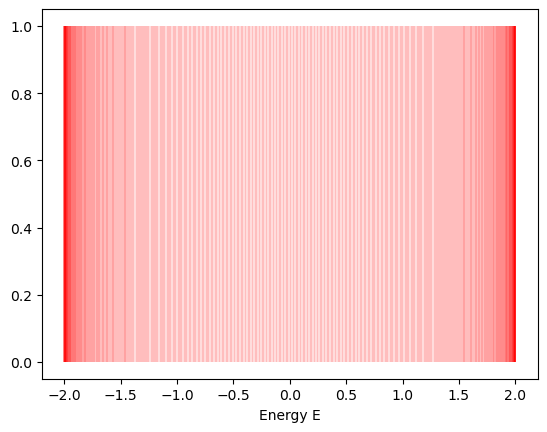

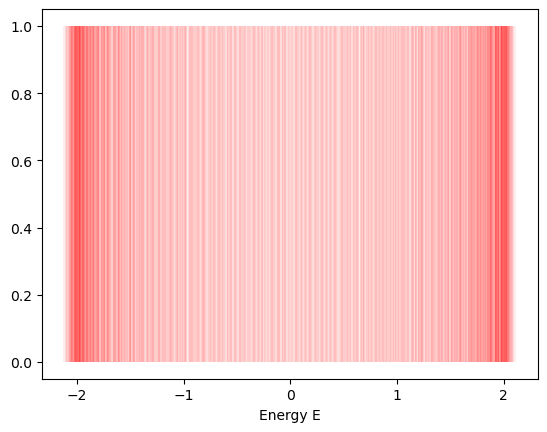

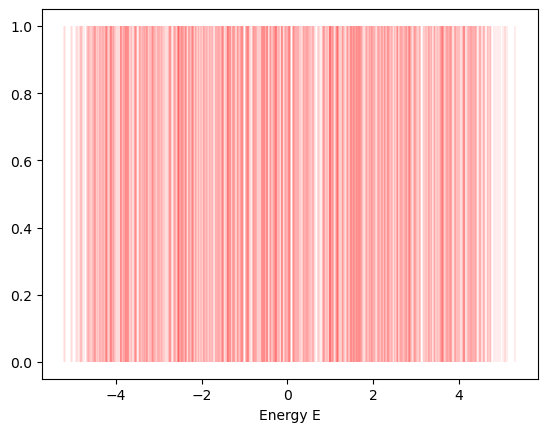

In [3]:
H=Anderson_H(1000,0,1,'y')
A=np.linalg.eigh(H)
y=A[0]
plt.vlines(y,0,1,color='r',linewidth=0.1)
plt.xlabel("Energy E")
plt.savefig(path+"spectrW=0.png")
plt.show()

H=Anderson_H(1000,0.5,1,'y')
y=np.linalg.eigh(H)[0]
plt.vlines(y,0,1,color='r',linewidth=0.1)
plt.xlabel("Energy E")
plt.savefig(path+"spectrW=0.5.png")
plt.show()

H=Anderson_H(1000,8,1,'y')
y=np.linalg.eigh(H)[0]
plt.vlines(y,0,1,color='r',linewidth=0.1)
plt.xlabel("Energy E")
plt.savefig(path+"spectrW=8.png")
plt.show()


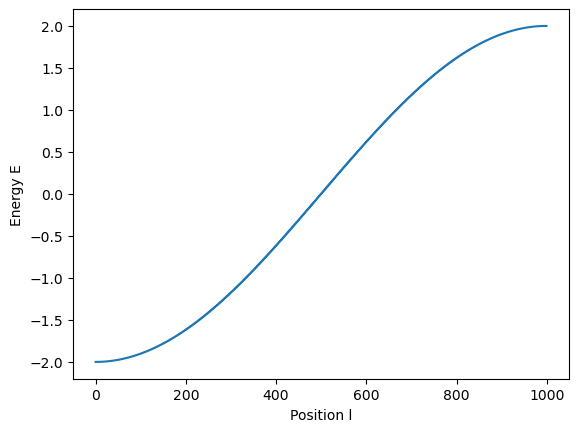

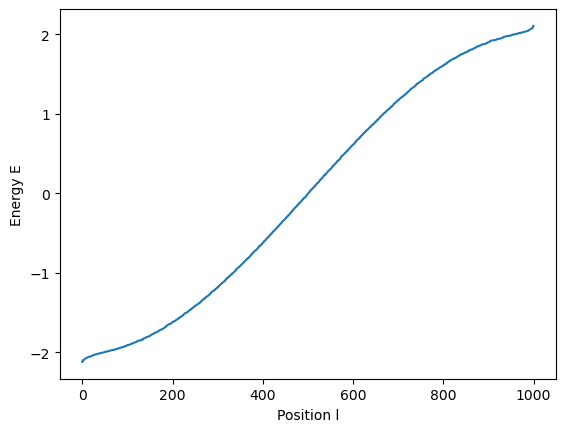

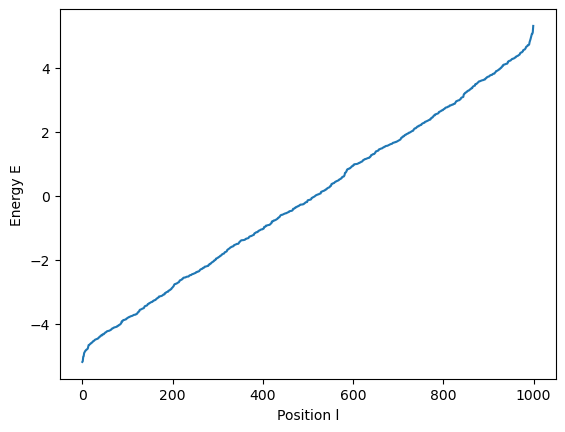

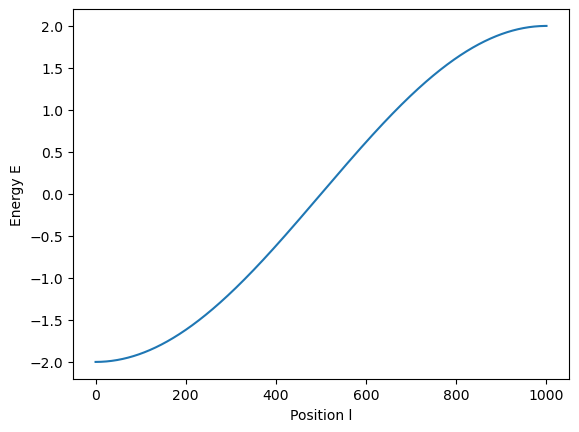

In [4]:
H=Anderson_H(1000,0,1,'y')
A=np.linalg.eigh(H)
y=A[0]
plt.plot(y)
plt.ylabel("Energy E")
plt.xlabel("Position l")
#plt.plot(x,-2*np.cos((q)*np.pi*x/1000))  #comparison W=0
plt.savefig(path+"spectrLineW=0.png")
plt.show()

H=Anderson_H(1000,0.5,1,'y')
y=np.linalg.eigh(H)[0]
plt.plot(y)
plt.ylabel("Energy E")
plt.xlabel("Position l")
plt.savefig(path+"spectrLineW=0.5.png")
plt.show()

H=Anderson_H(1000,8,1,'y')
y=np.linalg.eigh(H)[0]
plt.plot(y)
plt.ylabel("Energy E")
plt.xlabel("Position l")
plt.savefig(path+"spectrLineW=8.png")
plt.show()

q=1
x=np.linspace(0,1000,1000)
plt.plot(x,-2*np.cos((q)*np.pi*x/1000))
plt.ylabel("Energy E")
plt.xlabel("Position l")
plt.savefig(path+"spectrLineW=0analytic.png")
plt.show()

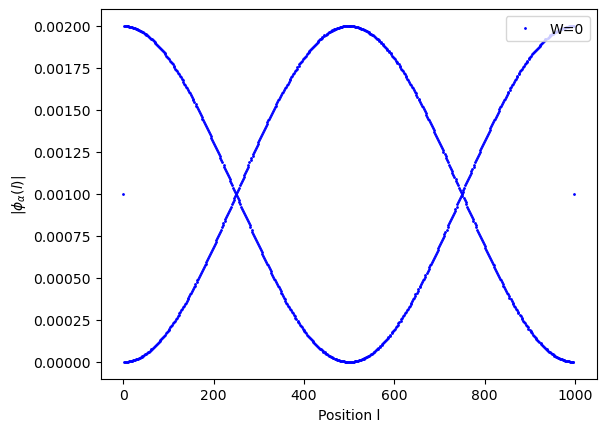

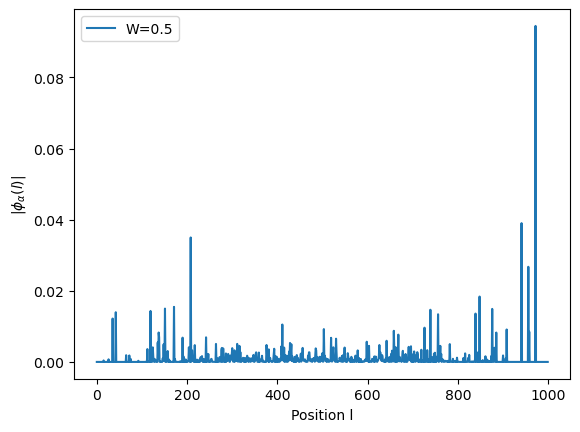

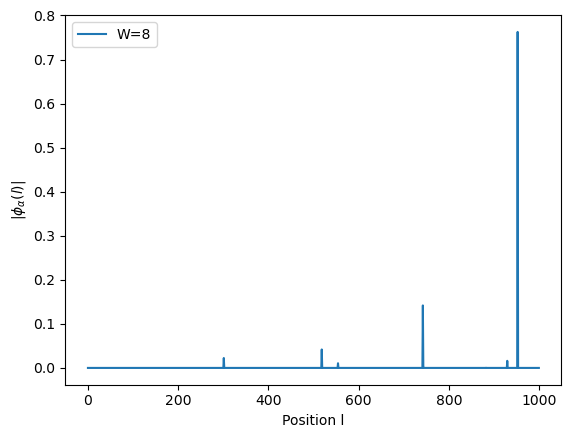

In [5]:
H=Anderson_H(1000,0,1,'y')
A=np.linalg.eigh(H)
plt.plot(A[1][1]**2,'bo',markersize=1,label="W=0")
plt.xlabel("Position l")
plt.ylabel(r"$|\phi_\alpha(l)|$")
plt.legend(loc='upper right')
plt.savefig(path+"envelopeW=0.png")
plt.show()



H=Anderson_H(1000,0.5,1,'y')
A=np.linalg.eigh(H)
plt.plot(A[1][1]**2,label="W=0.5")
plt.xlabel("Position l")
plt.ylabel(r"$|\phi_\alpha(l)|$")
plt.legend()
plt.savefig(path+"envelopeW=0.5.png")
plt.show()

H=Anderson_H(1000,8,1,'y')
A=np.linalg.eigh(H)
plt.plot(A[1][1]**2,label="W=8")
plt.xlabel("Position l")
plt.ylabel(r"$|\phi_\alpha(l)|$")
plt.legend()
plt.savefig(path+"envelopeW=8.png")
plt.show()

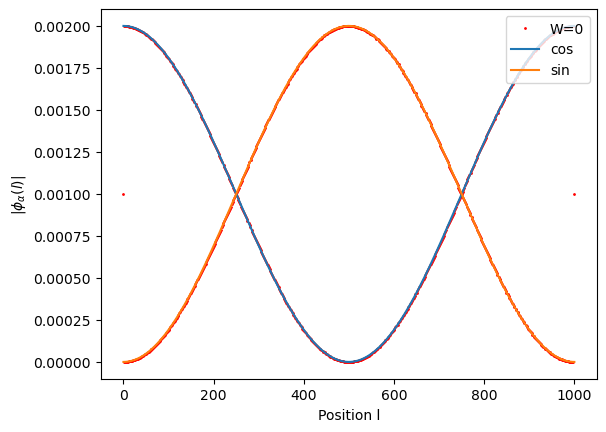

In [6]:
H=Anderson_H(1000,0,1,'y')
A=np.linalg.eigh(H)
q=1
plt.plot(A[1][1]**2,'ro',markersize=1,label="W=0")
x=np.linspace(0,1000,1000)
plt.xlabel("Position l")
plt.ylabel(r"$|\phi_\alpha(l)|$")
plt.plot(x,2/1000*np.cos((q)*np.pi*x/1000)**2,label="cos")
plt.plot(x,2/1000*np.sin((q)*np.pi*x/1000)**2,label="sin")
plt.legend(loc='upper right')
plt.savefig(path+"envelopeW=0analytic.png")
plt.show()



In [7]:
def IPR(psi):
    res=0
    for i in range(len(psi)):
        res+=np.linalg.norm(psi[i])**4
    return res

def IPR_hist(N_r,W,L=1000):
    array=[]
    
    for j in range(N_r):
        
        H=Anderson_H(L,W,1,'n')
        A=np.linalg.eigh(H) 
        
        for i in range(L):
            array.append(IPR(A[1][i]))
            
    plt.hist(array)
    plt.ylabel("counts")
    plt.xlabel("IPR")
    plt.savefig(path+f"IPRW={W}.png")
    plt.show()        
    return    


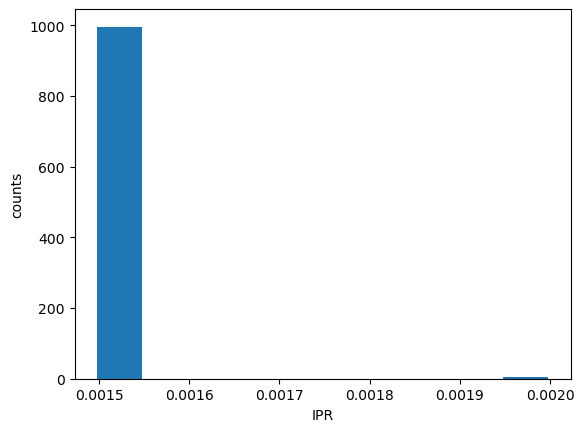

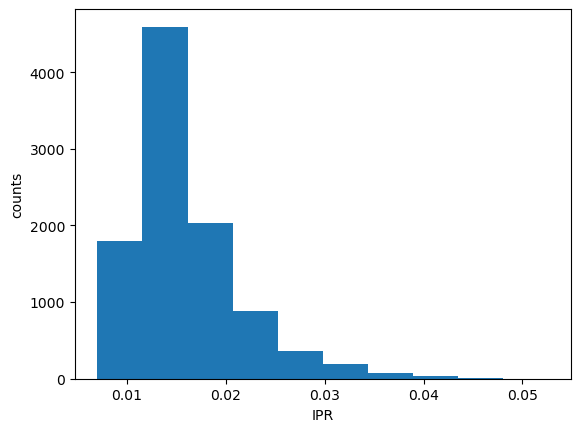

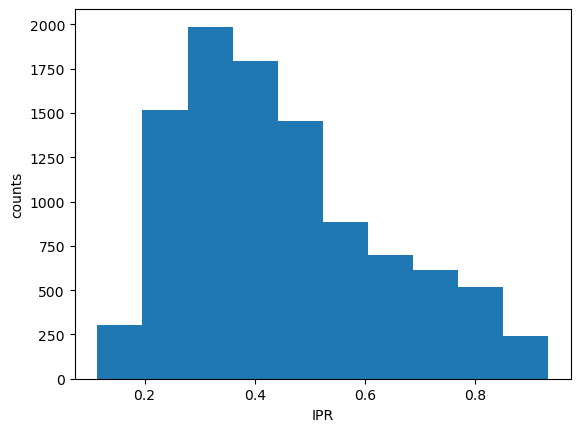

In [8]:
IPR_hist(1,0,1000)
IPR_hist(10,0.5,1000)
IPR_hist(10,8,1000)

In [9]:
def IPR_average(N_r,W,L=1000):
    array=[]
    
    for j in range(N_r):
        
        H=Anderson_H(L,W,1,'n')
        A=np.linalg.eigh(H) 
        
        for i in range(L):
            array.append(IPR(A[1][i]))
                   
    return np.mean(array)   

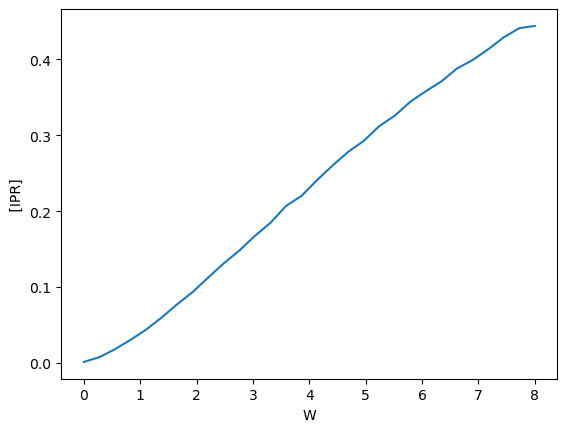

In [10]:
t=np.linspace(0,8,30)
y=[IPR_average(10,i) for i in t]
plt.plot(t,y)
plt.xlabel("W")
plt.ylabel(" [IPR] ")
plt.savefig(path+"IPRaverage.png")
plt.show()
